# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

See full course materials on GitHub: https://github.com/mrdbourke/tensorflow-deep-learning/

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

## Import Necessary Libraries

In [1]:
# Frameworks for model Building
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import seaborn as sns
sns.set()

import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [2]:
# Frameworks for supporting the model
import os           # To converse with Operating System
import pathlib      # To efficiently handle the file paths
import zipfile      # To handle the Zip files
import random       # To add randomness to our model

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-01-15 18:25:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip      43%[=======>            ]  45.80M  15.4MB/s               

In [ ]:
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

## Inspect the data

In [ ]:
!ls pizza_steak 

In [ ]:
!ls pizza_steak/test

In [ ]:
!ls pizza_steak/test/pizza

In [ ]:
# Walk through the pizza_steak directories and print the number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories & {len(filenames)} files in the {dirpath}")

In [ ]:
# specific directory inspection
!ls -la pizza_steak

In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

To visualize our images, first let's get the class names programmatically.

In [ ]:
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

In [2]:
# Let's visualize our images
def  view_random_img(target_dir, target_class):
  # Setup the target path
   target_folder = target_dir + target_class

   random_img = random.sample(os.listdir(target_folder),1)
   

   img = mimg.imread(target_folder +"/"+ random_img[0])
   plt.imshow(img)
   plt.title(target_class)
   plt.axis("off");

   print(f"Image Shape: {img.shape}")
   #print(random_img)

   return img

In [3]:
img = view_random_img(target_dir="pizza_steak/train/", target_class="steak")

NameError: ignored

In [ ]:
224, 224, 3

In [15]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[32, 23, 14],
        [33, 24, 15],
        [31, 22, 13],
        ...,
        [27, 28, 14],
        [24, 25, 11],
        [22, 23,  9]],

       [[27, 18,  9],
        [29, 20, 11],
        [28, 19, 10],
        ...,
        [26, 27, 13],
        [24, 25, 11],
        [22, 23,  9]],

       [[21, 12,  5],
        [24, 15,  6],
        [25, 16,  7],
        ...,
        [26, 27, 13],
        [23, 24, 10],
        [21, 22,  8]],

       ...,

       [[47, 47, 49],
        [49, 49, 51],
        [49, 49, 51],
        ...,
        [82, 83, 88],
        [79, 80, 85],
        [75, 76, 81]],

       [[46, 46, 48],
        [49, 49, 51],
        [49, 49, 51],
        ...,
        [81, 82, 87],
        [79, 80, 85],
        [74, 75, 80]],

       [[44, 44, 46],
        [47, 47, 49],
        [47, 47, 49],
        ...,
        [79, 80, 85],
        [77, 78, 83],
        [72, 73, 78]]], dtype=uint8)>

In [16]:
# View the shape of image
img.shape

(512, 512, 3)

## An end-to-end example 

Let's build a convolutional neural network to find patterns in our images, more specifically we a need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
# Set the seed
tf.random.set_seed(42)

# Preprocess data (Get all of the pixel values 0 & 1, also called scaling/normalizaion)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup the train & test directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into directories
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

# Building the CNN model
model_1 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(filters=10,
                               kernel_size=3,
                               activation="relu",
                               input_shape=(224,224,3)),
     
        tf.keras.layers.Conv2D(filters=10,
                               kernel_size=3,
                               activation="relu",
                               input_shape=(224,224,3)),
     
        tf.keras.layers.MaxPool2D(pool_size=2,
                                  padding="valid"),
     
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2),
     
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ], 
    name="Food_Classification_CNNmodel_1"
)

# Compile the model
model_1.compile( 
                loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"]
)

# Fit the model
model_1.fit(train_data, 
            epochs=5,
            steps_per_epoch= len(train_data),
            validation_data=valid_data,
            validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 217ms/step - loss: 0.5658 - accuracy: 0.7080 - val_loss: 0.4724 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 10s 204ms/step - loss: 0.4203 - accuracy: 0.8053 - val_loss: 0.3392 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 0.4036 - accuracy: 0.8213 - val_loss: 0.3394 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.3920 - accuracy: 0.8207 - val_loss: 0.3124 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 10s 203ms/step - loss: 0.3206 - accuracy: 0.8627 - val_loss: 0.3456 - val_accuracy: 0.8800


> 🔑 **Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelator -> GPU (you may have to rerun some cells above).

Looks like our model performed well enough to beat the accuracy of the original Food101 dataset paper: https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf 

(however, our results are of course not fully comparable, their model got 50.76% accuracy across 101 classes, our model achieved ~88% accuracy on 2 classses)

In [ ]:
model_1.summary()

🛠 **Practice/exercise:** Go through the CNN explainer website for a minimum of 10-minutes and compare our neural network with thiers: https://poloclub.github.io/cnn-explainer/

## Using the Same model as before


Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the [TensorFlow playground](http://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.52527&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). 

In [ ]:
train_data

In [ ]:
# Set the seed
tf.random.set_seed(42)

# Build the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
], name="Food_Classification_model_2")

# Compile the model
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
meta = model_2.fit(train_data,
                   epochs=5,
                   steps_per_epoch=len(train_data),
                   validation_data = valid_data,
                   validation_steps = len(valid_data),)

In [22]:
model_2.summary()

Model: "Food_Classification_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


model_2's accuracy rate is terrible. And contains 20X more parameters. Let's improve it..

In [ ]:
# Set the seed
tf.random.set_seed(42)

# Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
], name="Food_Classification_model_3")

# Compile the model
model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
meta = model_3.fit(train_data,
                   epochs=5,
                   steps_per_epoch=len(train_data),
                   validation_data = valid_data,
                   validation_steps = len(valid_data),)

In [ ]:
model_3.summary()

In [ ]:
15000000/31000

> 🔑 **Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image.

# Binary Classification: Let's Break it down


1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

## 1.Become one with the data

In [ ]:
# To know the GPU details
!nvidia-smi

In [ ]:
# Random images of steak & pizaa
plt.subplot(1,2,1)
img1 = view_random_img("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
img2 = view_random_img("pizza_steak/train/", "pizza" )

## 2.Preprocess the data (preparing data for the model)

In [ ]:
# Defining directory dataset paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health... https://twitter.com/ylecun/status/989610208497360896?s=20 

In [ ]:
# Create train & test data generators and resclae it
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32,
                                               seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32,
                                             seed=42)

In [ ]:
# Get a sample of training data batch
images, labels = train_data.next()
len(images), len(labels)

In [ ]:
# How many batches in training dataset
len(train_data)

In [ ]:
# Get first two images
images[:2]

In [ ]:
# Shapes of the images
images[0].shape

In [ ]:
# View the first batch labels
labels

## 3.Create a CNN model (start with a baseline)



A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [ ]:
# Make the creation of our model little easier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

In [ ]:
model_4 = Sequential(
    [
      Conv2D(filters=10,
              kernel_size=(3,3),
              strides=(1,1),
              activation="relu",
              padding="valid",
              input_shape=(224,224,3)),
     Conv2D(10,3,activation="relu"),
     Conv2D(10,3,activation="relu"),
     Flatten(),
     Dense(1, activation="sigmoid")
])

🛠 **Practice:** Understand what's going on in a Conv2D layer by going through the CNN explainer website for 10-20 minutes: https://poloclub.github.io/cnn-explainer/

In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# Get a summary of our model
model_4.summary()

## 4.Fit the model

In [ ]:
# Chec the lengths of training & testing data generators
len(train_data), len(test_data)

In [ ]:
# Fit the model
meta_4 = model_4.fit(train_data, 
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

## 5.Evaluate the model

In [ ]:
pd.DataFrame(data=meta_4.history).plot(title="Base model Performence", figsize=(10,7));

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curve(meta):

  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

  loss = meta.history["loss"]
  accuracy = meta.history["accuracy"]

  val_loss = meta.history["val_loss"]
  val_accuracy = meta.history["val_accuracy"]

  epochs = range(len(meta_4.history["loss"]))

  sns.lineplot(data=meta.history, y=loss, x=epochs, label="loss", ax=ax1)
  sns.lineplot(data=meta.history, y=val_loss, x=epochs, label="val_loss", ax=ax1).set(title="Loss Curve", xlabel="epochs")
  ax1.grid(False)
  ax1.legend(loc="upper right");
 

  sns.lineplot(data=meta.history, y=accuracy, x=epochs, label="accuracy", ax=ax2)
  sns.lineplot(data=meta.history, y=val_accuracy, x=epochs, label="val_accuracy", ax=ax2).set(title="Accuracy Curve", xlabel="epochs")
  ax2.grid(False)
  ax2.legend(loc="lower right");


> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

In [ ]:
plot_loss_curve(meta_4)

> 🔑 **Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be **overfitting**. 

## 6.Adjust the model parameters



Fitting a machine learning model comes in 3 steps:

* 0. Create a baseline
* 1. Beat the baseline by overfitting a larger model
* 2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> 🔑 **Note:** Reducing overfitting is also known as **regularization**.

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# Fit the model
meta_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
model_5.summary()

In [ ]:
plot_loss_curve(meta_5)

## Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with Data Augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔 **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjuting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [ ]:
# Import data from directory & augment it
print("Augmented train data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   target_size=(224,224),
                                                                   class_mode="binary",
                                                                   batch_size=32,
                                                                   shuffle=False)

# Create non-augmented train data batches
print("Non-augmented train data:")
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32,
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

> 🔑 **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!

In [ ]:
# Get sample from batches
images, labels = train_data.next()
images_augmented, labels_augmented = train_data_augmented.next()

In [ ]:
rand_img = random.randint(0,32)

print(f"Random Number:{rand_img}")
#fig, (ax1,ax2) = plt.subplots(1,2)
plt.imshow(images[rand_img])
plt.title("Original Image")
plt.axis(False)

plt.figure()
plt.imshow(images_augmented[rand_img])
plt.title("Augmented Image")
plt.axis(False);

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [54]:
# Create a model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                      
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
meta_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 480ms/step - loss: 0.6998 - accuracy: 0.4993 - val_loss: 0.6743 - val_accuracy: 0.6240
Epoch 2/5
47/47 [==============================] - 22s 468ms/step - loss: 0.7210 - accuracy: 0.5307 - val_loss: 0.6768 - val_accuracy: 0.5140
Epoch 3/5
47/47 [==============================] - 22s 468ms/step - loss: 0.6942 - accuracy: 0.5193 - val_loss: 0.6632 - val_accuracy: 0.7480
Epoch 4/5
47/47 [==============================] - 22s 468ms/step - loss: 0.6655 - accuracy: 0.6667 - val_loss: 0.5747 - val_accuracy: 0.7820
Epoch 5/5
47/47 [==============================] - 22s 469ms/step - loss: 0.6250 - accuracy: 0.6840 - val_loss: 0.5633 - val_accuracy: 0.7220


Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

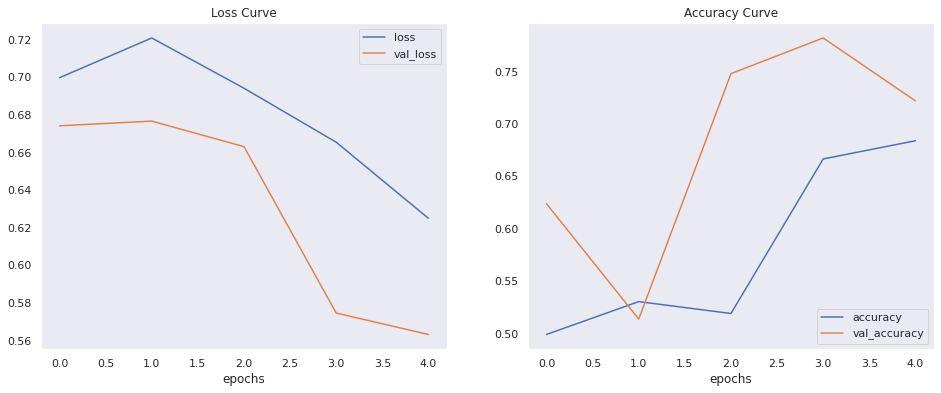

In [55]:
plot_loss_curve(meta_6)

In [56]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [57]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                     
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer="Adam", 
                metrics=["accuracy"])

# Fit the model
meta_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 478ms/step - loss: 0.6415 - accuracy: 0.6227 - val_loss: 0.5428 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 22s 472ms/step - loss: 0.5690 - accuracy: 0.7147 - val_loss: 0.4069 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 22s 477ms/step - loss: 0.4863 - accuracy: 0.7627 - val_loss: 0.4312 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 22s 472ms/step - loss: 0.4655 - accuracy: 0.7847 - val_loss: 0.4224 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 22s 472ms/step - loss: 0.4701 - accuracy: 0.7767 - val_loss: 0.3564 - val_accuracy: 0.8500


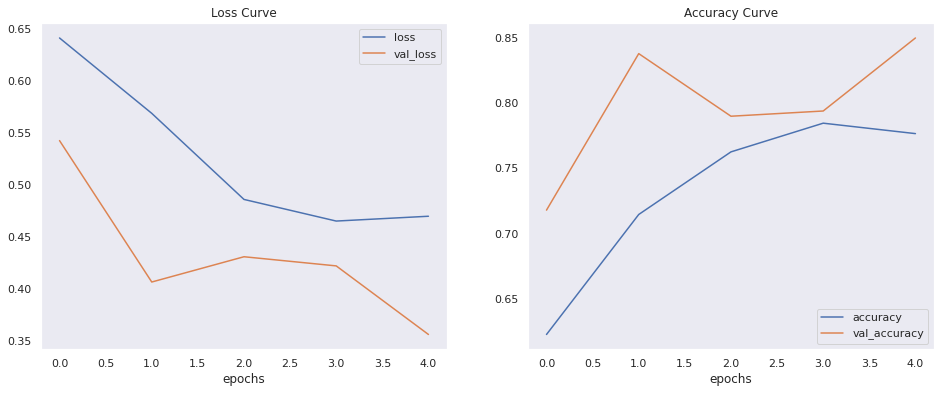

In [61]:
plot_loss_curve(meta_7)

> 🔑 **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

## Repeat until satisfied



Since we've already beaten our baseline, there are a few things we could try to contine to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate 
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

> 🛠 **Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.

# Make predictions until satisfied

In [62]:
print(class_names)

['pizza' 'steak']


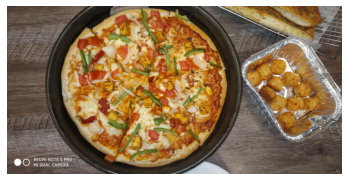

In [102]:
pizza_1 = mimg.imread("/content/pizza-1.jpg")
plt.imshow(pizza_1)
plt.axis(False);

In [103]:
pizza_1.shape

(2000, 4000, 3)

> 🔑 **Note:** When you a train a neural network and you want to make a prediction with it on your own custom data, it's important than your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [99]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it 
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [112]:
pizza = load_and_prep_image("/content/pizza-1.jpg")
pizza

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.20342137, 0.16826731, 0.14893958],
        [0.19205683, 0.15704282, 0.1297319 ],
        [0.17553024, 0.14807926, 0.11670671],
        ...,
        [0.47743127, 0.46566656, 0.4384957 ],
        [0.45812243, 0.4385146 , 0.41506517],
        [0.31595877, 0.2847263 , 0.2417291 ]],

       [[0.34579834, 0.29481795, 0.25952384],
        [0.28641456, 0.24719888, 0.2079832 ],
        [0.2963185 , 0.24925968, 0.20220086],
        ...,
        [0.49427786, 0.4785916 , 0.44329748],
        [0.46118388, 0.41412506, 0.36706623],
        [0.31744856, 0.26670828, 0.20396319]],

       [[0.3466187 , 0.30740303, 0.26818734],
        [0.34181675, 0.30260107, 0.26338536],
        [0.3254101 , 0.27835128, 0.23129247],
        ...,
        [0.44557765, 0.4377345 , 0.3906757 ],
        [0.4913575 , 0.44429868, 0.3958393 ],
        [0.23515725, 0.1847379 , 0.13935934]],

       ...,

       [[0.371488  , 0.31266448, 0.2852135 ],
        [0.30

In [111]:
pred = model_7.predict(tf.expand_dims(pizza,axis=0))
pred

1/1 [==============================] - 0s 15ms/step


array([[0.53211474]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [123]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [124]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [134]:
def predict_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[ int(tf.round(pred)) ]
  
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 17ms/step


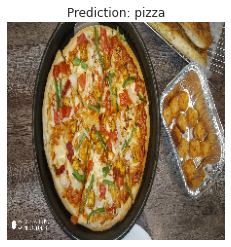

In [135]:
# Let's plot the image & predict the class
predict_and_plot(model_6, "/content/pizza-1.jpg");